# Linear Regression with One Variable

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. The file **ex1data1.txt** (available under week 2's assignment material) contains the dataset for our linear regression exercise. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [ ]:
!pip install matplotlib

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os

In [ ]:
data = pd.read_csv('ex1data1.txt', header = None) #read from dataset
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data
#data.describe()
data.shape

(97, 2)

### Plot Dataset using scatter to visualize the pattern in it

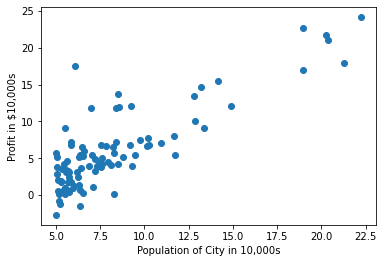

In [ ]:
# Plot Data
plt.scatter(X, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

### Add Intercept and Parameters initilization

we add another dimension to our data to accommodate the intercept term (the reason for doing this is explained in the videos). We also initialize the initial parameters theta to 0 and the learning rate alpha to 0.01.

In [ ]:
#### DONT CHANGE THIS CODE ####
X = np.array(X)
y = np.array(y)
X = X[:,np.newaxis]
y = y[:,np.newaxis]
# Hyperparameters
iterations = 1500
alpha = 0.01
X

array([[ 6.1101],
       [ 5.5277],
       [ 8.5186],
       [ 7.0032],
       [ 5.8598],
       [ 8.3829],
       [ 7.4764],
       [ 8.5781],
       [ 6.4862],
       [ 5.0546],
       [ 5.7107],
       [14.164 ],
       [ 5.734 ],
       [ 8.4084],
       [ 5.6407],
       [ 5.3794],
       [ 6.3654],
       [ 5.1301],
       [ 6.4296],
       [ 7.0708],
       [ 6.1891],
       [20.27  ],
       [ 5.4901],
       [ 6.3261],
       [ 5.5649],
       [18.945 ],
       [12.828 ],
       [10.957 ],
       [13.176 ],
       [22.203 ],
       [ 5.2524],
       [ 6.5894],
       [ 9.2482],
       [ 5.8918],
       [ 8.2111],
       [ 7.9334],
       [ 8.0959],
       [ 5.6063],
       [12.836 ],
       [ 6.3534],
       [ 5.4069],
       [ 6.8825],
       [11.708 ],
       [ 5.7737],
       [ 7.8247],
       [ 7.0931],
       [ 5.0702],
       [ 5.8014],
       [11.7   ],
       [ 5.5416],
       [ 7.5402],
       [ 5.3077],
       [ 7.4239],
       [ 7.6031],
       [ 6.3328],
       [ 6

In [ ]:
## Write the code ##
# Initlize Parameters () to ZERO
theta = np.zeros((2,1))
# Initilize one to be multiplied with intercept
x_0 = np.ones((97,1))
# Stack ones withe actual data set as it will look like following output.
b=np.column_stack((x_0,X))
X=b


In [ ]:
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [ ]:
theta # Intialized Theta should be ZERO.

array([[0.],
       [0.]])

### COST FUNCTION ####
Implement the MSE cost function for above mentioned dataset. The formula is as followed.
![Mean_Squared_Error](res/MSE.png "MSE")


In [ ]:
### WRITE CODE HERE ###
# NOTE:- You may use vectorized implemention of cost function using numpy library.
# Hint:- np.dot function will help you to implement vectorized dot product of theta and input features.
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    temp1 = np.sum(np.power(temp,2)) /(2*m)
    return temp1


theta


array([[0.],
       [0.]])

In [ ]:
# Initial Cost
J = computeCost(X, y, theta)
print(J)


32.072733877455676


### Finding the optimal parameters using Gradient Descent¶
The Paritial Derivative of the Cost function is:
![derivatives](res/derivatives.png "MSE")

In [ ]:
### WRITE CODE HERE ###
# NOTE:- According to passed parameters .
# Hint:- Don't Directly update the actual theta but use temp variable during update.

#def gradientDescent(X, y, theta, alpha, iterations):
def gradientDescent(X, y, theta, alpha, iterations):
    for _ in range(iterations):

        t2 = np.dot(theta,X)- y
        t3= np.dot(t2,X)
        theta1 = np.sum(t3/(m))

        t4 = np.dot(theta,X)- y
        t5= np.dot(t2,x_0)
        theta0 = np.sum(t3/(m))
    t6 = theta1[0:1]
    t7 = theta0[1:1]
    b = np.column_stack((t6,t7))
    theta = b
    return theta

theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)





ValueError: shapes (2,1) and (97,2) not aligned: 1 (dim 1) != 97 (dim 0)

Expected theta values [-3.6303, 1.1664]



In [ ]:
# Calculate the Cost after converging of thetas for number of iterations.
J = computeCost(X, y, theta)
print(J)

4.483388256587726


### Plot showing the best fit line¶


In [ ]:
## Expected Output plot....##
plt.scatter(X[:,1], y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], np.dot(X, theta))
plt.savefig('graph.png')
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

## Linear Regression with Multiple Predictors (Variable)

**Problem context:** Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. Your job is to predict housing prices based on other variables.


The first column is the **size of the house (in square feet)**, the second column is the **number of bedrooms**, and the third column is the **price** of the house.

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('ex1data2.txt', sep = ',', header = None)
# X = data.iloc[:,0:2] # read first two columns into X
# y = data.iloc[:,2] # read the third column into y
m = len(y) # no. of training samples
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
X.head(5)

,0,1
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [ ]:
y.head(5)

0    399900
1    329900
2    369000
3    232000
4    539900
Name: 2, dtype: int64

As can be seen above we are dealing with more than one independent variables here (but the concepts you have learnt in the previous section applies here as well)

## Feature Scaling and Normalization

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.


Feature Scaling can be performed with following steps.
1. Subtract the mean value of each feature from the dataset.
1. After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

In [ ]:
X.head(5)

,0,1
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [ ]:
X_iv = (X - np.mean(X))/np.std(X)


In [ ]:
X_iv.head(5)

,0,1
0,1.401769,-1326.871320
1,0.760713,-1326.871320
2,1.778262,-1326.871320
3,0.526677,-1328.199619
4,2.541424,-1325.543022


### Apply the Z-Score Scaling the features. And use following Z-Score Scaling foru
![scaling](res/scaling.png "MSE")

In [ ]:
### WRITE CODE HERE ###
# Feature scaling for each column independently

# print("Scaled X:\n", X_scaled)

# Expected Output is provided for refernce.

Scaled X:
            0         1
0   0.131415 -0.226093
1  -0.509641 -0.226093
2   0.507909 -0.226093
3  -0.743677 -1.554392
4   1.271071  1.102205
5  -0.019945  1.102205
6  -0.593589 -0.226093
7  -0.729686 -0.226093
8  -0.789467 -0.226093
9  -0.644466 -0.226093
10 -0.077182  1.102205
11 -0.000866 -0.226093
12 -0.140779 -0.226093
13  3.150993  2.430504
14 -0.931924 -0.226093
15  0.380715  1.102205
16 -0.865783 -1.554392
17 -0.972626 -0.226093
18  0.773743  1.102205
19  1.310501  1.102205
20 -0.297227 -0.226093
21 -0.143323 -1.554392
22 -0.504553 -0.226093
23 -0.049200  1.102205
24  2.403094 -0.226093
25 -1.145609 -0.226093
26 -0.690256 -0.226093
27  0.668173 -0.226093
28  0.253521 -0.226093
29  0.809358 -0.226093
30 -0.205648 -1.554392
31 -1.272803 -2.882690
32  0.050011  1.102205
33  1.445326 -0.226093
34 -0.241262  1.102205
35 -0.716966 -0.226093
36 -0.968810 -0.226093
37  0.167030  1.102205
38  2.816474  1.102205
39  0.205188  1.102205
40 -0.428237 -1.554392
41  0.301855 -0.226093


In [ ]:
### WRITE CODE HERE ###
# In above features add a column of ones in dataset for intercept term.



array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

In [ ]:
# Hyperparamters. Don't change there for submission
alpha = 0.01
num_iters = 400
y = np.array(y)
y = y[:,np.newaxis]


In [ ]:
## WRITE CODE HERE ##
# Initialize Thetas to ZERO for above dataset.


In [ ]:
## WRITE CODE HERE ###
# Complete cost function for more than one input features.
def computeCostMulti(X, y, theta):


J = computeCostMulti(X, y, theta)
print(J)
# Expected Output.

65591548106.45744


In [ ]:
# Complete the Gradient Descent and use the equations used in previous exercise.
def gradientDescentMulti(X, y, theta, alpha, iterations):
    m = len(y) # length of dataset (No of Samples)


theta = gradientDescentMulti(X, y, theta, alpha, num_iters)
print(theta)

[[nan]
 [nan]
 [nan]]


C:\Users\ameer\AppData\Local\Temp\ipykernel_12644\52576152.py:6: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha/m) * temp


In [ ]:
# A new nornalization to calculate thetas
theta = gradientDescentMulti(X_scaled1, y, theta, alpha, iterations)
print(theta)

[[340412.56301439]
 [109370.05670466]
 [ -6500.61509507]]


In [ ]:
J = computeCostMulti(X_scaled1, y, theta)
print(J)

2043282709.9327548
